In [1]:
import torch

#### Construct a 5x3 matrix, uninitialised

In [2]:
x = torch.empty(5,3)

In [3]:
print(x)

tensor([[-3.1215e+03,  4.5873e-41, -3.1215e+03],
        [ 4.5873e-41,         nan,  0.0000e+00],
        [ 1.7753e+28,  4.4339e+27,  1.3848e-14],
        [ 6.8801e+16,  1.8370e+25,  1.4603e-19],
        [ 6.8794e+11,  2.7253e+20,  3.0866e+29]])


#### construct a randomly initialised matrix

In [4]:
x = torch.rand(5,3)
print(x)

tensor([[0.4053, 0.9814, 0.0726],
        [0.5645, 0.5492, 0.9265],
        [0.6155, 0.4392, 0.3733],
        [0.5309, 0.2339, 0.3503],
        [0.0744, 0.9326, 0.5670]])


#### construct a zeros filled matrix and of dtype long:

In [5]:
x = torch.zeros(5,3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


#### construct a tensor directly from data:

In [6]:
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


#### create a tensor based on an existing tensor

In [7]:
x = x.new_ones(5,3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.1000,  0.3579, -0.8031],
        [ 0.4747, -0.8329,  1.3442],
        [ 0.8781,  0.9936,  1.9656],
        [-0.1213,  0.2141, -1.5851],
        [-1.1930, -0.0850,  0.3571]])


#### get its size

In [9]:
print(x.size())

torch.Size([5, 3])


### Operations

#### Addition. Syntax 1

In [10]:
y = torch.rand(5,3)
print(x+y)

tensor([[ 0.3626,  0.5233, -0.5012],
        [ 0.8838, -0.3978,  2.2713],
        [ 1.7848,  1.5193,  2.2057],
        [ 0.2547,  0.8760, -1.2088],
        [-0.5632,  0.5672,  0.7791]])


#### Addition. syntax 2

In [11]:
print(torch.add(x,y))

tensor([[ 0.3626,  0.5233, -0.5012],
        [ 0.8838, -0.3978,  2.2713],
        [ 1.7848,  1.5193,  2.2057],
        [ 0.2547,  0.8760, -1.2088],
        [-0.5632,  0.5672,  0.7791]])


#### Addition. Providing ad output tensor as argument

In [12]:
result = torch.empty(5,3)
torch.add(x,y, out=result)
print(result)

tensor([[ 0.3626,  0.5233, -0.5012],
        [ 0.8838, -0.3978,  2.2713],
        [ 1.7848,  1.5193,  2.2057],
        [ 0.2547,  0.8760, -1.2088],
        [-0.5632,  0.5672,  0.7791]])


#### Addition. In-place

##### Any operation that mutates a tensor in-place is post-fixed with an _.

In [14]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 0.3626,  0.5233, -0.5012],
        [ 0.8838, -0.3978,  2.2713],
        [ 1.7848,  1.5193,  2.2057],
        [ 0.2547,  0.8760, -1.2088],
        [-0.5632,  0.5672,  0.7791]])


### Standard NumPy-like indexing

In [16]:
print(x[:,1])

tensor([ 0.3579, -0.8329,  0.9936,  0.2141, -0.0850])


#### Resizing with `torch.view`

In [17]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8) # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


#### if you have a one element tensor, use `.item()` to get value as a Python number

In [18]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.6287])
0.6286905407905579


### Numpy bridge
##### Converting a Torch Tensor to a Numpy array and vice versa. The Torch Tensor and the NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other

#### Converting a Torch Tensor to a Numpy Array

In [19]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [20]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


#### See how the numpy array changes is value while changing the Torch Tensor

In [21]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### Converting NumPy Array to Torch Tensor

In [22]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### All the Tensors on the CPU except a CharTensor support converting to NumPy and back

### CUDA Tensors

#### Tensors can be moved onto any device using the `.to` method

In [25]:
# we will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

tensor([1.6287], device='cuda:0')
tensor([1.6287], dtype=torch.float64)


### AUTOGRAD

#### The `autograd` package provides automatic differentiation for all operations on Tensors. It is a define-by-run frfamework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

#### `torch.Tensor` is the central class of the package. If you set its attribute `.requires_grad` as True, it starts to track all operations on it. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into `.grad` attribute.

#### Create a tensor and set `requires_grad=True` to track computation with it

In [27]:
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [28]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [29]:
print(y.grad_fn)

In [30]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


#### `.requires_grad(...)` chages an existing Tensor's `requires_grad` flag in-place. The input flag defaults to False if not given

In [31]:
a = torch.randn(2,2)
a = ((a*3) / (a-1))
print(a)

tensor([[ -2.1711,  28.4228],
        [-17.6782,  -1.4889]])


In [32]:
print(a.requires_grad)

False


In [33]:
a.requires_grad_(True)
print(a.requires_grad)

True


In [34]:
b = (a*a).sum()
print(b.grad_fn)

In [37]:
print(b)

tensor(1127.3046, grad_fn=<SumBackward0>)


### Gradients

In [38]:
out.backward()

In [39]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


#### vecotr-Jacobian product

In [41]:
x = torch.randn(3, requires_grad=True)

In [42]:
y = x * 2
while y.data.norm() < 1000:
    y = y*2
print(y)    

tensor([-1185.7300,  -187.7309,  -459.1601], grad_fn=<MulBackward0>)


In [43]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float)
y.backward(v)
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### stop autograd from tracking history on Tensors with `.requires_grad=True`, by wrapping the code block in `with torch.no_grad()"`

In [44]:
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


## Neural Networks

#### Neural Networks can be constructed using the `torch.nn` package.
#### `nn` depends on `autograd` to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input)`that returns the `output`

### Define a ConvNet

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [14]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#### You just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.

#### The learnable parameters of a model are returned by net.parameters()

In [15]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


#### let's try a random 32x32 input

In [16]:
input = torch.randn(1 ,1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1345, -0.0281,  0.0900,  0.0630, -0.1262,  0.0315, -0.1091,  0.1004,
         -0.0607, -0.0364]], grad_fn=<AddmmBackward>)


#### You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. You can use any of the Tensor operations in the `forward` function.

In [17]:
net.zero_grad()

In [18]:
out.backward(torch.randn(1,10))

### Loss function

In [20]:
output = net(input)
target = torch.randn(10)
target = target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.3216, grad_fn=<MseLossBackward>)


#### Now, if you follow loss in the backward direction, using its .grad_fn attribute, you will see a graph of computations that looks like this:

#### input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
####      -> view -> linear -> relu -> linear -> relu -> linear
####      -> MSELoss
####      -> loss

In [21]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop

#### To backpropagate the error all we have to do is to loss.backward().

In [22]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0011,  0.0093, -0.0036, -0.0035, -0.0150,  0.0004])


### Update the weights

In [23]:
import torch.optim as optim

In [25]:
optimizer = optim.SGD(net.parameters(), lr = 0.01)
#in the training loop:
optimizer.zero_grad() #zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()


## Training a classifier

##### a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

##### For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

#### In this tutorial, we will:
- load and normalize the CIFAR10 training and test datasets using `torchvision`
- Define a Convolutional Neural Network
- Define a loss function
- Train the network on the training data
- Test the network on the test data

##### 1- Loading and normalizing CIFAR10

In [26]:
import torch
import torchvision
import torchvision.transforms as transforms

##### The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].

In [27]:
transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)
classes=('plane','car','bird','cat', 'deer','dog','frog','horse','ship','truck')

0it [00:00, ?it/s]

 98%|█████████▊| 167501824/170498071 [00:14<00:00, 20614367.52it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


170500096it [00:29, 20614367.52it/s]                               

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

In [38]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

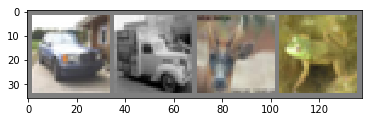

  car truck  deer  frog


In [39]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

##### 2- Define a Convolutional Neural Network

In [41]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

##### 3- Define a Loss function and optimizer

In [42]:
import torch.optim as optim

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

##### 4- Train the network

###### We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [48]:
for epoch in range(2):  #loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini_batches
            print('[%d, %5d] loss: %.3f' % 
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.623
[1,  4000] loss: 1.544
[1,  6000] loss: 1.499
[1,  8000] loss: 1.467
[1, 10000] loss: 1.412
[1, 12000] loss: 1.382
[2,  2000] loss: 1.330
[2,  4000] loss: 1.294
[2,  6000] loss: 1.274
[2,  8000] loss: 1.275
[2, 10000] loss: 1.255
[2, 12000] loss: 1.239
Finished Training


##### 5- Test the network on the test data

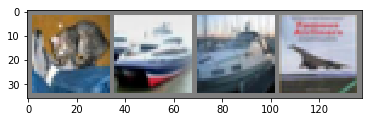

GroundTruth:    cat  ship  ship plane


In [49]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [50]:
outputs = net(images)

In [51]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


#### Let us look at how the network performs on the whole dataset.

In [52]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


#### what are the classes that performed well, and the classes that did not perform well:

In [53]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 57 %
Accuracy of  bird : 55 %
Accuracy of   cat : 32 %
Accuracy of  deer : 47 %
Accuracy of   dog : 38 %
Accuracy of  frog : 63 %
Accuracy of horse : 63 %
Accuracy of  ship : 68 %
Accuracy of truck : 75 %


### Training on GPU

In [55]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [56]:
print(device)

cuda:0


In [57]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [58]:
inputs, labels = data[0].to(device), data[1].to(device)

In [59]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [61]:
for epoch in range(2):  #loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini_batches
            print('[%d, %5d] loss: %.3f' % 
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.190
[1,  4000] loss: 1.815
[1,  6000] loss: 1.623
[1,  8000] loss: 1.526
[1, 10000] loss: 1.466
[1, 12000] loss: 1.433
[2,  2000] loss: 1.327
[2,  4000] loss: 1.298
[2,  6000] loss: 1.303
[2,  8000] loss: 1.266
[2, 10000] loss: 1.249
[2, 12000] loss: 1.212
Finished Training


In [62]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
